<a href="https://colab.research.google.com/github/namoshi/mytest/blob/master/tf_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import multivariate_normal, permutation
import pandas as pd
from pandas import DataFrame, Series

In [ ]:
np.random.seed(20160512)

n0, mu0, variance0 = 800, [10, 11], 20
data0 = multivariate_normal(mu0, np.eye(2) * variance0, n0)
df0 = DataFrame(data0, columns=['x1', 'x2'])
df0['t'] = 0

n1, mu1, variance1 = 600, [18, 20], 22
data1 = multivariate_normal(mu1, np.eye(2) * variance1, n1)
df1 = DataFrame(data1, columns=['x1', 'x2'])
df1['t'] = 1

df = pd.concat([df0, df1], ignore_index=True)
df = df.reindex(permutation(df.index)).reset_index(drop=True)

num_data = int(len(df)*0.8)
train_set = df[:num_data]
test_set = df[num_data:]

In [3]:
print(test_set)

             x1         x2  t
1120  10.272639  13.483904  0
1121  17.185304  13.922994  1
1122  17.929504  31.542986  1
1123  11.166547   4.749774  0
1124  14.136998  15.953333  0
1125  10.482127  14.431167  0
1126  13.354608  11.675708  1
1127  21.869704  20.504602  1
1128   6.250942  12.037814  0
1129   7.784671  14.723197  0
1130   8.663905   4.770827  0
1131   4.248480  12.951018  0
1132  19.443464  23.213851  1
1133  14.444539  18.927434  1
1134  13.257652  26.984624  1
1135  15.768197   9.268111  0
1136  20.217349  25.507136  1
1137  16.172871  13.011922  0
1138   8.062074   6.435163  0
1139  24.601903  18.414950  1
1140  14.793028  11.466635  0
1141  14.012548   8.590183  0
1142  19.672835  23.295414  1
1143   8.108547   8.574529  0
1144   3.022640   4.461653  0
1145   5.247902  11.572709  0
1146  26.205818  26.818485  1
1147  16.126796   7.010126  0
1148  11.561765  11.919225  0
1149  22.271191  23.169647  1
...         ...        ... ..
1370   7.242838   6.456931  0
1371   6.4

In [ ]:
train_x = train_set[['x1', 'x2']].as_matrix()
train_t = train_set['t'].as_matrix().reshape([len(train_set), 1])
test_x = test_set[['x1', 'x2']].as_matrix()
test_t = test_set['t'].as_matrix().reshape([len(test_set), 1])


In [ ]:
x = tf.placeholder(tf.float32, [None, 2])
w = tf.Variable(tf.zeros([2, 1]))
w0 = tf.Variable(tf.zeros([1]))
f = tf.matmul(x, w) + w0
p = tf.sigmoid(f)

t = tf.placeholder(tf.float32, [None, 1])
loss = -tf.reduce_sum(t*tf.log(p) + (1-t)*tf.log(1-p))
train_step = tf.train.AdamOptimizer().minimize(loss)

In [ ]:
correct_prediction = tf.equal(tf.sign(p-0.5), tf.sign(t-0.5))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [ ]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [8]:
train_accuracy = []
test_accuracy = []

i = 0
for _ in range(20000):
  i += 1
  sess.run(train_step, feed_dict={x:train_x, t:train_t})
  acc_val = sess.run(accuracy, feed_dict={x:train_x, t:train_t})
  train_accuracy.append(acc_val)
  acc_val = sess.run(accuracy, feed_dict={x:test_x, t:test_t})
  test_accuracy.append(acc_val)
  if i % 2000 == 0:
    loss_val, acc_val = sess.run([loss, accuracy], feed_dict={x:train_x, t:train_t})
    print('Step: %d, Loss: %f, Accuracy: %f' % (i, loss_val, acc_val))

Step: 2000, Loss: 531.159180, Accuracy: 0.890179
Step: 4000, Loss: 407.633667, Accuracy: 0.908929
Step: 6000, Loss: 336.626495, Accuracy: 0.910714
Step: 8000, Loss: 294.622711, Accuracy: 0.910714
Step: 10000, Loss: 270.262482, Accuracy: 0.913393
Step: 12000, Loss: 257.140411, Accuracy: 0.914286
Step: 14000, Loss: 251.176651, Accuracy: 0.915179
Step: 16000, Loss: 249.368896, Accuracy: 0.915179
Step: 18000, Loss: 249.179306, Accuracy: 0.915179
Step: 20000, Loss: 249.178314, Accuracy: 0.915179


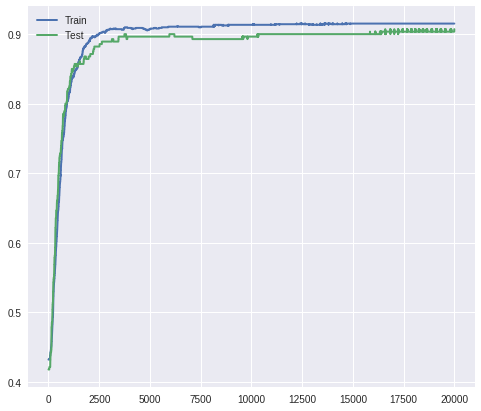

In [9]:
#print(test_t)
#print(test_accuracy)
fig = plt.figure(figsize=(8,7))
subplot = fig.add_subplot(1,1,1)
subplot.plot(range(len(train_accuracy)), train_accuracy, linewidth=2, label='Train')
subplot.plot(range(len(test_accuracy)), test_accuracy, linewidth=2, label='Test')
subplot.legend(loc='upper left')

In [10]:
w0_val, w_val = sess.run([w0, w])
print(w0_val)
print(w_val)

[-11.66188]
[[0.34997043]
 [0.41544837]]


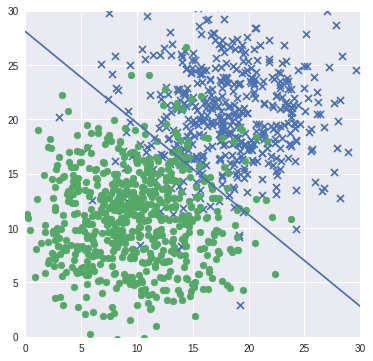

In [11]:
train_set0 = train_set[train_set['t'] == 0]
train_set1 = train_set[train_set['t'] == 1]

fig = plt.figure(figsize=(6,6))
subplot = fig.add_subplot(1,1,1)
subplot.set_ylim([0,30])
subplot.set_xlim([0,30])
subplot.scatter(train_set1.x1, train_set1.x2, marker='x')
subplot.scatter(train_set0.x1, train_set0.x2, marker='o')

linex = np.linspace(0, 30, 10)
liney = - (w_val[0][0] * linex / w_val[1][0] + w0_val / w_val[1][0])
subplot.plot(linex, liney)
